## K Nearest Neighbors

The ideia of KNN is to separate regions of information that best cluster our data based on their features. Like we'll be seing here, we can separate users by some informations that we may collect about them, like, their age, estimated Salary and probability of puchase some product from our ads on social networks.

The knn will see the users information, and will try to separate the informations in "k" groups, as "k" being the number of groups we may pass to the algorithm. 

The algorithm will separate the data points based in some distance metric, like the euclidean distance:
$$d_{P1, P2} = \sqrt{(x2 - x1)^2 + (y2 - y1)^2}$$

In the end of the clustering, the idea is that, we will be able of predict the classification of a new user based on their collected information.


Importing the preprocessing and plotting libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Dataset and analyse it:

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


Gráfico "User ID"


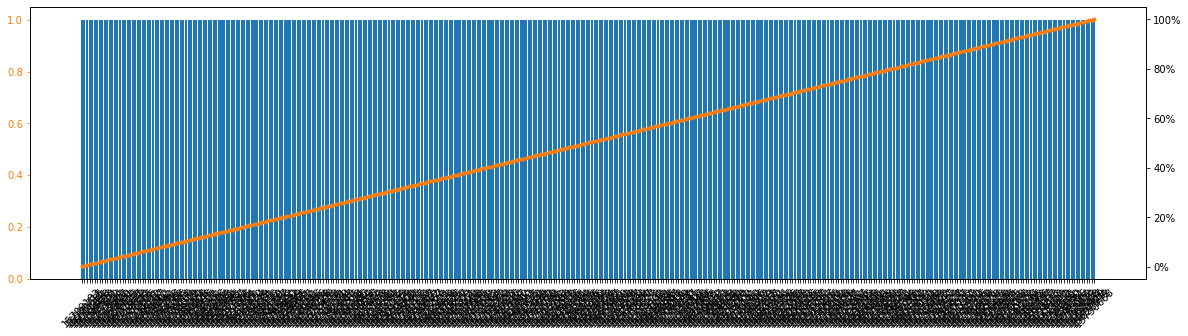

Gráfico "Gender"


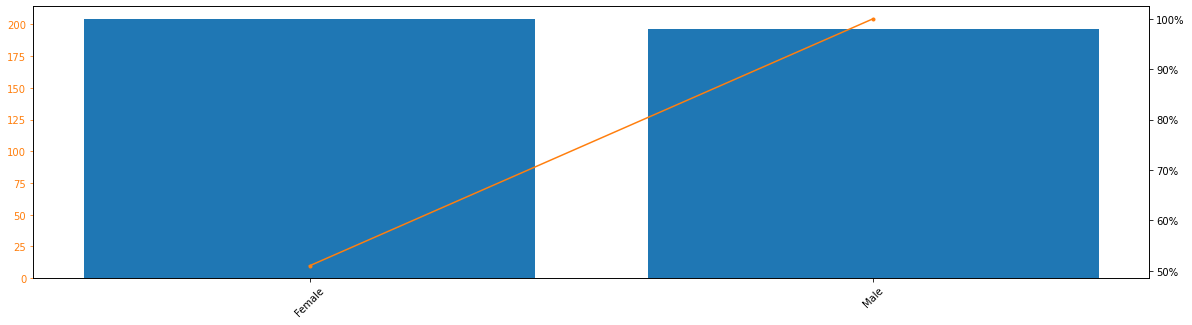

Gráfico "Age"


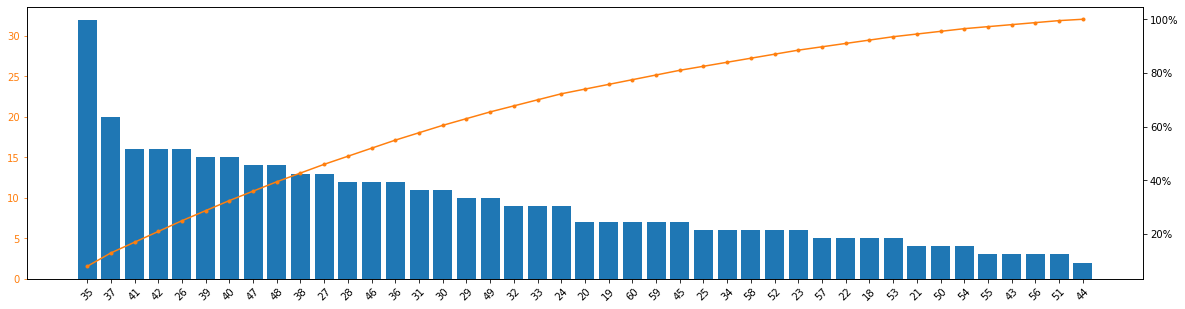

Gráfico "EstimatedSalary"


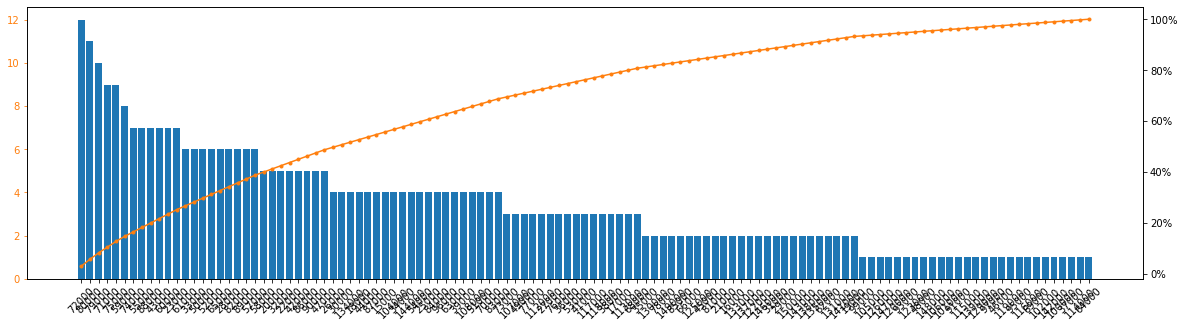

Gráfico "Purchased"


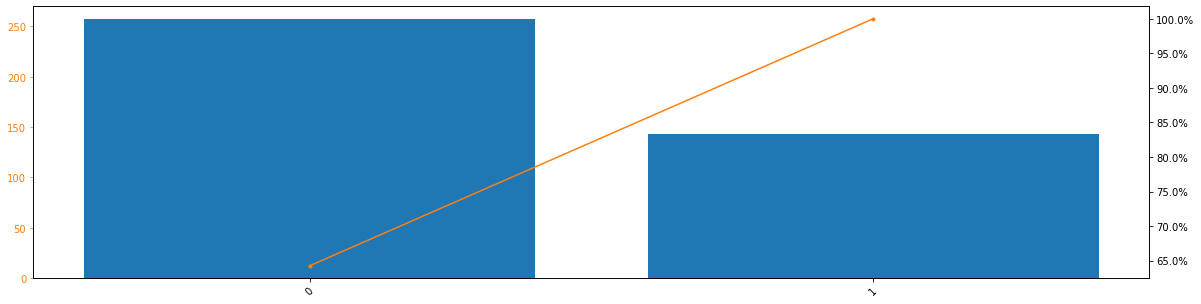

In [7]:
from matplotlib.ticker import PercentFormatter

def pareto_chart(df_, Column):
    df = pd.DataFrame({Column:df_[Column].value_counts().index.astype(str).tolist(), 'Count':df_[Column].value_counts().tolist()})
    df['Percentage'] = df['Count'].cumsum()/df['Count'].sum()*100

    fig, ax = plt.subplots(figsize=(20,5))
    ax.bar(df[Column], df['Count'], color='C0')
    ax2 = ax.twinx()
    ax2.plot(df[Column], df['Percentage'], color='C1', marker=".")
    ax2.yaxis.set_major_formatter(PercentFormatter())

    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="y", colors="C1")

    for tick in ax.get_xticklabels():
        # Setting the X category angle of adjustment
        tick.set_rotation(45)
    plt.show()

for col in data.columns:
    print('Gráfico "{}"'.format(col))
    pareto_chart(df_=data, Column=col) 

In [24]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In the graphs plotted on cells above, we see that we don't have any distribution problem as unbalance classes, so we may continue the project.

Verifying missing data:

In [25]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

since the data doesn\`t have any missing value, we can continue the preprocessing fase:

Splitting the dataset into *Dependent* and *Independent Variables*.

In [26]:
X = data.iloc[:, 2:-1].values
Y = data.iloc[:, -1].values

print(f'Dependent Variables: \n{X[:5]} \n\nIndependen Variables: \n{Y[:5]}')

Dependent Variables: 
[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]] 

Independen Variables: 
[0 0 0 0 0]


From the dependent and independent data, splitting it into training and test sets:

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0) 

As K Nearest Neighbors is an algorithm that uses euclidean distance, it\`s important for performance and accuracy porposes to apply feature scalling.

In [28]:
from sklearn.preprocessing import StandardScaler

ss_knn = StandardScaler()

X_train = ss_knn.fit_transform(X_train)
X_test = ss_knn.transform(X_test)

In [29]:
print(f'Training data after Standardizing: \n{X_train[:5]} \n\nTest Data after Standardizing: \n{X_test[:5]}')

Training data after Standardizing: 
[[ 1.92295008  2.14601566]
 [ 2.02016082  0.3787193 ]
 [-1.3822153  -0.4324987 ]
 [-1.18779381 -1.01194013]
 [ 1.92295008 -0.92502392]] 

Test Data after Standardizing: 
[[-0.79895082  0.49460758]
 [-0.02126485 -0.57735906]
 [-0.31289709  0.14694273]
 [-0.79895082  0.26283101]
 [-0.31289709 -0.57735906]]


Creating KNN object and fitting the Data into a model:

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#Creating the KNN object setting the K = 5
knn = KNeighborsClassifier(n_neighbors=5)

#Fitting the model on the presented data
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Results Visualization:

Model`s accuracy Score: 	0.95


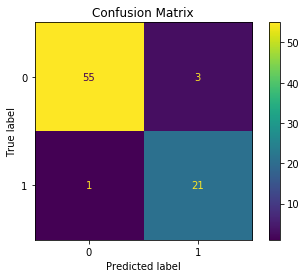

In [31]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score

#Setting the Confusion matrix objects:
display = plot_confusion_matrix(knn, X_test, Y_test, normalize=None)
display.ax_.set_title('Confusion Matrix')
print(f'Model`s accuracy Score: \t{accuracy_score(Y_test, knn.predict(X_test))}')

### Visualizing the Decision boundary of the model:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


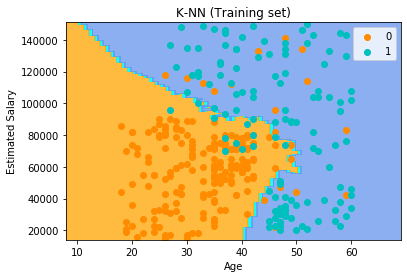

In [43]:
#Creating the KNN object setting the K = 5
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

#Fitting the model on the presented data
knn.fit(X_train, Y_train)

# Creating color map
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

X_set, y_set = ss_knn.inverse_transform(X_train), Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(ss_knn.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = cmap_light)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = cmap_bold(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

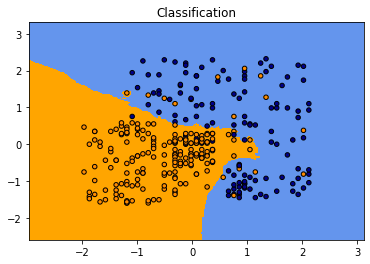

In [33]:
#Creating the KNN object setting the K = 5
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

#Fitting the model on the presented data
knn.fit(X_train, Y_train)

# Creating color map
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

# Creating the grid size:
xmin, xmax = X_train[:, 0].min()-1, X_train[:, 0].max()+1 
ymin, ymax = X_train[:, 1].min()-1, X_train[:, 1].max()+1

# Creating a rectangular grid for the the view of decision borders:
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.02),
                     np.arange(ymin, ymax, 0.02))

# Transforming the rectangular matrix from mesh in one column for X and Y and concatenating in one matrix of 2 columns for prediction:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

#Placing the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# plotting the data points on graphs:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold, edgecolors='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Classification')

plt.show()